<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-relevant-python-packages" data-toc-modified-id="Import-relevant-python-packages-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Import relevant python packages</a></span></li><li><span><a href="#$\langle-r-|(E-H_0)G_0|-r^{'}-\rangle=\langle-r-|\mathbb{1}|-r^{'}-\rangle$" data-toc-modified-id="$\langle-r-|(E-H_0)G_0|-r^{'}-\rangle=\langle-r-|\mathbb{1}|-r^{'}-\rangle$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>$\langle r |(E-H_0)G_0| r^{'} \rangle=\langle r |\mathbb{1}| r^{'} \rangle$</a></span></li><li><span><a href="#$\langle-r-|V|-r^{'}-\rangle$" data-toc-modified-id="$\langle-r-|V|-r^{'}-\rangle$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>$\langle r |V| r^{'} \rangle$</a></span></li><li><span><a href="#$G$" data-toc-modified-id="$G$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>$G$</a></span></li><li><span><a href="#LDOS" data-toc-modified-id="LDOS-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LDOS</a></span></li></ul></div>

# Import relevant python packages

In [1]:
import numpy as np #Numerical package for arrays, algebra...
%pylab notebook 
from mpl_toolkits.mplot3d import Axes3D #generate 3D plots
from scipy.special import j0,y0 #0th order Bessel function of first and second kind
import time

Populating the interactive namespace from numpy and matplotlib


# $\langle r |(E-H_0)G_0| r^{'} \rangle=\langle r |\mathbb{1}| r^{'} \rangle$ 


# $\langle r |V| r^{'} \rangle$ 

# $G$ 

# LDOS

In [2]:
npix=30
norm=1
eps=1e-8
def return_G0(x_p,y_p,k=0.1):
    G0=np.zeros((npix,npix),dtype=np.complex)
    x,y=np.indices(G0.shape)
    r=eps+np.sqrt((x-x_p)**2+(y-y_p)**2)
    G0=-norm*(y0(k*r)+1j*j0(k*r))
    return G0

def return_V(x_p,y_p,sigma=2.,amp=100.):
    V=np.zeros((npix,npix),dtype=np.float32)
    x,y=np.indices(V.shape)
    V=amp*(1./(2.*np.pi*sigma**2.))*np.exp(-((x-x_p)**2.+(y-y_p)**2.)/(2.*sigma**2.))
    return V

def return_random_V(n_sites=5,sig_mean=10,sig_width=4.,amp_mean=100.,amp_width=10.,seed=0):
    V=np.zeros((npix,npix),dtype=np.float32)
    x,y=np.indices(V.shape)
    np.random.seed(seed)
    x_idx=np.random.choice(np.arange(npix),n_sites)
    y_idx=np.random.choice(np.arange(npix),n_sites)
    imp_amp=np.random.normal(amp_mean,amp_width,n_sites)
    imp_wid=np.random.normal(sig_mean,sig_width,n_sites)
#     print x_idx,y_idx,imp_amp
    for i in range(n_sites):
        V=V + imp_amp[i]*(1./(2.*np.pi*imp_wid[i]**2.))*np.exp(-((x-x_idx[i])**2.+(y-y_idx[i])**2.)/(2.*imp_wid[i]**2.))
    return V
        

def return_G(x_tip,y_tip,x_imp,y_imp,sigma=2.):
    G0=return_G0(x_p=x_tip,y_p=y_tip)
    V=return_V(x_p=x_imp,y_p=y_imp,sigma=sigma)
    np.identity(npix)
    return G
# r=np.linspace(0,10,1000)
# figure()
# plot(r,j0(r))
# plot(r,y0(r))

In [4]:
def get_r_given_xy(x,y):
    return x*npix+y

def get_xy_given_r(r):
    rj=mod(r,npix)
    ri=(r-rj)/npix
    return ri,rj

In [5]:
j=npix/2
V=np.zeros((npix,npix),dtype=np.complex)
for i in range(npix):
    for j in range(npix/2):
        V+=return_V(x_p=i,y_p=j,sigma=0.1,amp=1/10.)
        
Vall=diag(V.ravel())

<IPython.core.display.Javascript object>


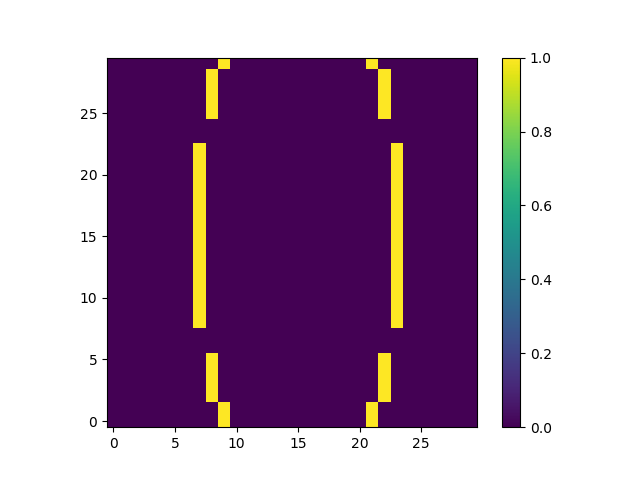

In [3]:
V=np.zeros((npix,npix),dtype=np.complex)
for i in range(npix):
    for j in range(npix):
        radius=(i-npix/2)**2/8 + (j-npix/2)**2
        if radius >= 60 and radius <=70:
            V[i,j]=1.

figure()
imshow(real(V),origin="lower")
colorbar()
        
Vall=diag(V.ravel())

In [7]:
j1=npix/3
j2=2*npix/3
V=np.zeros((npix,npix),dtype=np.complex)

for i in range(npix):
    V+=return_V(x_p=i,y_p=j1,sigma=0.1,amp=1/10.)
    V+=return_V(x_p=i,y_p=j2,sigma=0.1,amp=1/10.)
    
for j in range(npix):
    V+=return_V(x_p=j1,y_p=j,sigma=0.1,amp=1/10.)
    V+=return_V(x_p=j2,y_p=j,sigma=0.1,amp=1/10.)
        
Vall=diag(V.ravel())

<IPython.core.display.Javascript object>


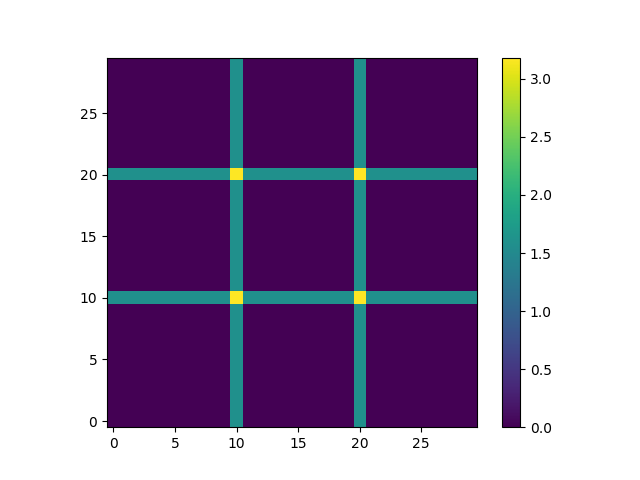

In [8]:
# V=return_V(x_p=11,y_p=7,sigma=0.5) + return_V(x_p=11,y_p=23,sigma=0.5)
#V=return_random_V(n_sites=5,sig_mean=1,sig_width=0.,seed=20,amp_mean=1.,amp_width=0.)
figure()
imshow(real(V),origin="lower")
colorbar()

In [4]:
start=time.time()
G0all=np.zeros((npix**2,npix**2),dtype=np.complex)
s=0
for itip in range(npix):
    for jtip in range(npix):
        G0all[:,s]=(return_G0(x_p=itip,y_p=jtip,k=.8)).ravel()
        s=s+1

I0=identity(npix**2,dtype=np.complex)
# G0V=np.matmul(G0all,Vall)
G0V=np.einsum("ij,jj->ij",G0all,Vall)
#Ainv=np.linalg.inv(A)
#Gnew=np.matmul(Ainv,G0all)
Gnew=np.linalg.solve(I0-G0V,G0all)
print time.time()-start

0.564170122147


1085


<IPython.core.display.Javascript object>


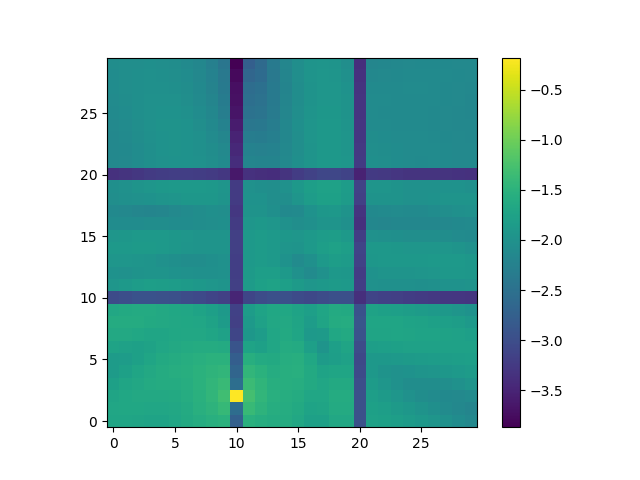

In [11]:
itip=35 ; jtip=35
s=get_r_given_xy(itip,jtip) ; print s
figure()
imshow(log10(abs(Gnew[:,70].reshape(npix,npix))),origin="lower")
colorbar()

<IPython.core.display.Javascript object>


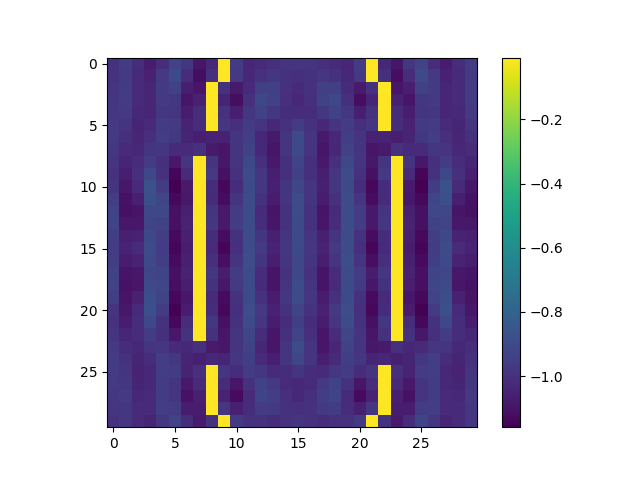

In [5]:
dos=imag(diag(Gnew)).reshape(npix,npix)

figure()
imshow(dos)
colorbar()

In [225]:
# I0=identity(npix**2,dtype=np.complex64)
# G0V=np.matmul(G0all,Vall)
# A=I0-G0V
# Ainv=np.linalg.inv(A)

# # G0V2=np.matmul(G0V,G0V)
# # G0V4=np.matmul(G0V2,G0V2)
# # Ainv=I0 + G0V - G0V2 + np.matmul(G0V2,G0V) - G0V4 + np.matmul(G0V4,G0V) - np.matmul(G0V4,G0V2)

# Gnew=np.matmul(Ainv,G0all)

In [19]:
x,y=np.indices(G0all.shape)

In [20]:
x

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ..., 
       [897, 897, 897, ..., 897, 897, 897],
       [898, 898, 898, ..., 898, 898, 898],
       [899, 899, 899, ..., 899, 899, 899]])